In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import numpy as np

Colormap:

In [2]:
def stability_cmap(LE):
    vmin = np.min(LE[:,:])
    vmax = np.max(LE[:,:])
    colors1 = plt.cm.PuRd(np.linspace(.25, 1., 1024))[::-1]        
    colors2 = plt.cm.Blues(np.linspace(.25, 1., int(1024*vmax/abs(vmin))))
    colors = np.vstack((colors1, colors2))
    mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
    mymap.set_under('white', 1.0)
    return mymap 

Parameters from the simulation:

In [3]:
beta = 2.3
sigma_2_max = .4
sigma_3_max = .2
n_sig_2 = 2
n_sig_3 = 2
sig_2 = np.arange(n_sig_2) * sigma_2_max/n_sig_2
sig_3 = np.arange(n_sig_2) * sigma_3_max/n_sig_2

# Block diagonalization

Loading the block diagonalization result:

In [42]:
cl = pickle.load(open("cluster_sync.p", "rb")) # 

In [43]:
cl.edges

{'2': array([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 1,  2],
        [ 1,  4],
        [ 2,  5],
        [ 3,  6],
        [ 3,  9],
        [ 3, 12],
        [ 4,  7],
        [ 4, 10],
        [ 4, 13],
        [ 5,  8],
        [ 5, 11],
        [ 5, 14],
        [ 6,  9],
        [ 7, 10],
        [12, 13]]),
 '3': array([[ 0,  1,  2],
        [ 0,  3, 12],
        [ 1,  4, 13],
        [ 2,  5, 14],
        [ 3,  6,  9],
        [ 4,  7, 10],
        [ 5,  8, 11]])}

In [44]:
cl.I

{'2': array([[ 1.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
         -1., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
          0.,  0.,  0.,  0.,  0.],
        [ 0., 

In [45]:
cl.edges['3']

array([[ 0,  1,  2],
       [ 0,  3, 12],
       [ 1,  4, 13],
       [ 2,  5, 14],
       [ 3,  6,  9],
       [ 4,  7, 10],
       [ 5,  8, 11]])

Plotting block structure:

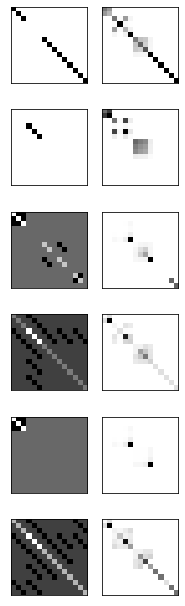

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import pickle
fig, axs = plt.subplots(6,2, figsize=(3, 11.))
for i in range(6):
    axs[i,0].imshow(1*(cl.SBD_input[i]), 'Greys')
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,1].imshow(np.abs(cl.U_SBD.T @ cl.SBD_input[i] @ cl.U_SBD), 'Greys')
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])

In [47]:
cl.U_SBD @ cl.SBD_input[0] @ cl.U_SBD.T

array([[ 0.83382992, -0.16617008,  0.33234015,  0.00562868,  0.00562868,
        -0.01125737,  0.0039514 ,  0.0039514 , -0.00790281,  0.0039514 ,
         0.0039514 , -0.00790281,  0.00442824,  0.00442824, -0.00885648],
       [-0.16617008,  0.83382992,  0.33234015,  0.00562868,  0.00562868,
        -0.01125737,  0.0039514 ,  0.0039514 , -0.00790281,  0.0039514 ,
         0.0039514 , -0.00790281,  0.00442824,  0.00442824, -0.00885648],
       [ 0.33234015,  0.33234015,  0.3353197 , -0.01125737, -0.01125737,
         0.02251473, -0.00790281, -0.00790281,  0.01580561, -0.00790281,
        -0.00790281,  0.01580561, -0.00885648, -0.00885648,  0.01771296],
       [ 0.00562868,  0.00562868, -0.01125737,  0.89713247, -0.10286753,
         0.20573506,  0.04478775,  0.04478775, -0.08957551,  0.04478775,
         0.04478775, -0.08957551,  0.05019255,  0.05019255, -0.1003851 ],
       [ 0.00562868,  0.00562868, -0.01125737, -0.10286753,  0.89713247,
         0.20573506,  0.04478775,  0.04478775, 

In [18]:
mle = pickle.load(open("norms.p", "rb")) 
mle = np.sum(mle[:, :, -500:], axis=2)/500

In [19]:
mle

array([[ 0.31413106,  0.44343684,  0.39536033,  0.44880222,  0.47328544,
         0.42792721,  0.81125214,  1.05141852,  1.21385124,  1.36682036],
       [-0.0534276 ,  0.2117125 ,  0.44824423,  0.56616472,  0.58402938,
         0.53342725,  0.89224413,  1.10154723,  1.25777886,  1.38676806],
       [ 0.24714333,  0.33263297,  0.41965869,  0.52038642,  0.47424673,
         0.80824436,  1.04394894,  1.19017383,  1.33487594,  1.44365163],
       [ 0.14649377,  0.20139229,  0.30385285,  0.35756908,  0.57422644,
         0.84522388,  1.03683301,  1.20978808,  1.3204621 ,  1.43608002],
       [-0.04073855,  0.01271848,  0.06554498,  0.1987497 ,  0.5621883 ,
         0.80426996,  0.99215504,  1.1482531 ,  1.28037898,  1.39726933],
       [-0.37555162, -0.1975662 , -0.03121822,  0.27696117,  0.58324881,
         0.80973741,  0.99143683,  1.14382429,  1.27546645,  1.39133919],
       [-0.63812506, -0.29201282, -0.1155802 ,  0.2654732 ,  0.56093707,
         0.78616043,  0.97637268,  1.12273406

# Stability results

Loading stability results:

In [24]:
mle = pickle.load(open("mle.p", "rb")) 
quotient = pickle.load(open("quotient.p", "rb"))
n_sigma_2 = np.shape(mle)[0]
n_sigma_3 = np.shape(mle)[1]

Additional clusters to check for:

In [49]:
extra_clusters = {} 
extra_clusters['0'] = [[0],[1]] 
extra_clusters['1'] = [[0, 1]] # full synchronization

Test which trajectories ended up synchronizing on a coarser cluster assignment:

In [50]:
n_test = 400
err = .01
cluster_indicators = {}
for cl_name in extra_clusters:
    errs = np.zeros((n_sigma_2, n_sigma_3))
    for cl in extra_clusters[cl_name]:
        cl_mean = np.expand_dims(np.mean(quotient[:, :, -n_test:, cl], axis=3), axis=3)
        cl_indexed = quotient[:, :, -n_test:, cl]
        cl_devs = np.sum(np.sum(np.abs(cl_indexed - cl_mean), axis=3), axis=2)
        errs+= cl_devs/100
    cluster_indicators[cl_name] =  errs < err

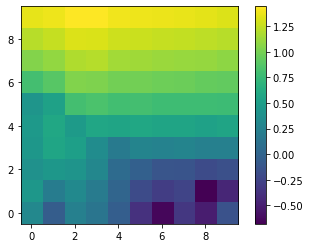

In [20]:
plt.imshow(mle.T, origin='lower')
plt.colorbar()

Showing which trajectories ended up fully synchronized:

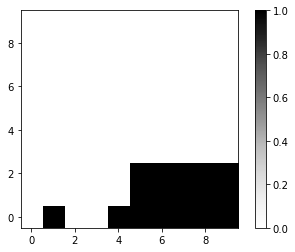

In [21]:
plt.imshow(mle.T<0, origin='lower', cmap='Greys') 
plt.colorbar()

In [27]:
plt.imshow(cluster_indicators['1'].T, origin='lower', cmap='Greys') 
plt.colorbar()

NameError: name 'cluster_indicators' is not defined

Plot MLE: 

NameError: name 'cluster_indicators' is not defined

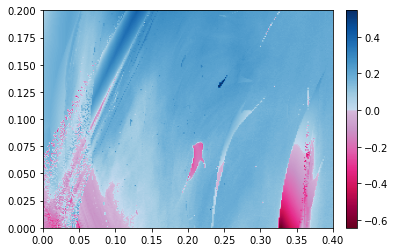

In [25]:
mymap = stability_cmap(mle)

extent=(0, sigma_2_max, 0, sigma_3_max)
plt.figure(0)
plt.imshow(mle.T, extent=extent, origin='lower', aspect=(3/2), cmap=mymap, alpha=1)
clb = plt.colorbar(fraction=0.045, pad=0.04)
plt.imshow(cluster_indicators['1'].T, extent=extent,origin='lower', aspect=1, cmap='Greys', alpha=.3)
plt.xlabel(r"$\sigma_2$", fontsize=18)
plt.ylabel(r"$\sigma_3$", fontsize=18)
clb.ax.set_title('Re(MLE)')

# Plotting trajectories

Plot any trajectory:

In [26]:
plt.figure(figsize=(16,1))
plt.plot(quotient[16,8, -50:, 0]) # 1.19 
plt.plot(quotient[16,8, -50:, 1]) # .1

IndexError: index 16 is out of bounds for axis 0 with size 10

<Figure size 1152x72 with 0 Axes>

Some representative trajectories:

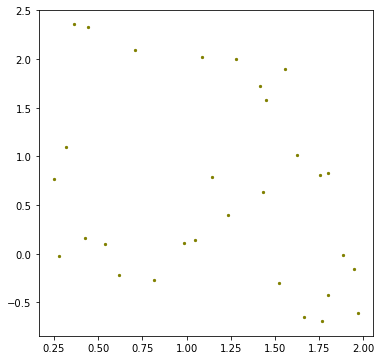

In [56]:
import copy
plt.figure(figsize=(6, 6))

t = quotient[122,1,:, :]
sig = 1
plt.scatter(t[-30:,0], t[-30:,1], 5, color='olive', label=r"$\sigma_2$="+str(sig))

#t = quotient[44,0,:,:]
#sig = 2*.6/100
#plt.scatter(t[-1500:,0], t[-1500:,1], 6, color='pink', label=r"$\sigma_2$="+str(sig))

#t = quotient[10,0,:,:]
#sig = 10*.6/100
#plt.scatter(t[-1500:,0], t[-1500:,1], 8, color='teal', label=r"$\sigma_2$="+str(sig))

#t = quotient[70,0,:,:]
#sig = 70*.6/100
#plt.scatter(t[-1500:,0], t[-1500:,1], 18, color='red', label=r"$\sigma_2$="+str(sig))

#plt.legend(loc=(1.1,0), fontsize=20)

#plt.xlabel(r"$x_0[i]$", fontsize=18)
#plt.ylabel(r"$x_1[i]$", fontsize=18)

# Direct simulation

Explicitly simulating the dynamics:

In [57]:
errors = np.zeros((10, 250))
for i in range(10):
    errors[i] = pickle.load(open("errs/err-" + str(i) + ".p", "rb")) 

In [261]:
np.min(mle)

-0.6416744341762907

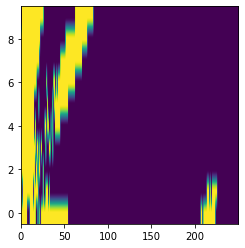

In [59]:
plt.imshow(errors<.2, origin='lower', aspect=25)

Text(0.5, 1.0, 'Re(MLE)')

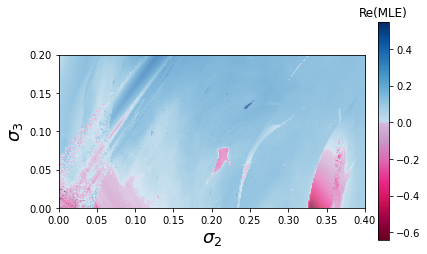

In [192]:
mymap = stability_cmap(mle)

extent=(0, sigma_2_max, 0, sigma_3_max)
plt.figure(0)
plt.imshow(mle.T, extent=extent, origin='lower', aspect=(3/2), cmap=mymap, alpha=1)
clb = plt.colorbar(fraction=0.045, pad=0.04)
plt.imshow(cluster_indicators['1'].T, extent=extent,origin='lower', aspect=1, cmap='Greys', alpha=.3)
plt.xlabel(r"$\sigma_2$", fontsize=18)
plt.ylabel(r"$\sigma_3$", fontsize=18)
clb.ax.set_title('Re(MLE)')

Text(0.5, 1.0, 'Re(MLE)')

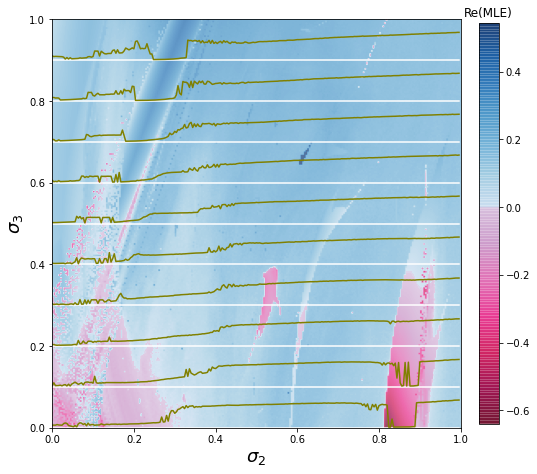

In [61]:
plt.figure(figsize=(8, 8))
scale = .05
extent=(0, sigma_2_max, 0, sigma_3_max)
plt.imshow(mle.T, extent=extent, origin='lower', aspect=(1), cmap=mymap, alpha=.7)
x = np.arange(250)*1/250
for ind in range(10):
    y = [ind*1/10]*250
    plt.plot(x,y, color='white')
    y = errors[ind] * scale + ind*1/10
    plt.plot(x,y, color='olive')
plt.xlabel(r"$\sigma_2$", fontsize=18)
plt.ylabel(r"$\sigma_3$", fontsize=18)
clb = plt.colorbar(fraction=0.045, pad=0.04)

clb.ax.set_title('Re(MLE)')

Or separately:

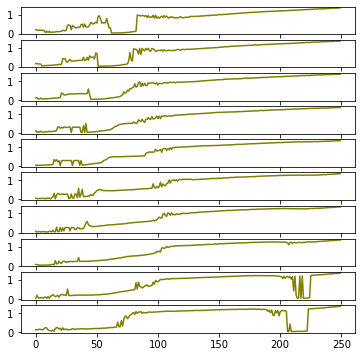

In [62]:
fig, axs = plt.subplots(10,1, figsize=(6, 6))
for i in range(10):
    axs[9-i].plot(errors[i], color='olive')

# Bifurcation diagram

<ipython-input-280-309dc99e5b5b>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


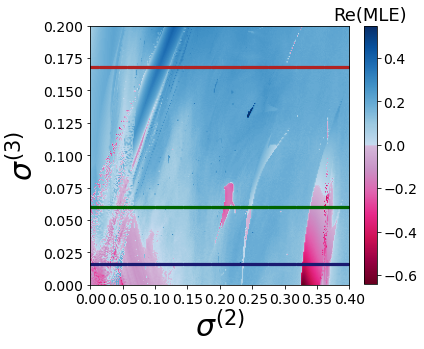

In [280]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)
plt.xlim(0,.4)
plt.ylim(0,.2)
ax = fig.add_subplot(111)


k = 210
y = k * .2/250
for ind in range(250):
    x = ind * .4/250
    plt.scatter(x,y, color='firebrick', s=5)
    
k = 75
y = k * .2/250
for ind in range(250):
    x = ind * .4/250
    plt.scatter(x,y, color='darkgreen', s=5)
    
k = 20
y = k * .2/250
for ind in range(250):
    x = ind * .4/250
    plt.scatter(x,y, color='midnightblue', s=5)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
    
mymap = stability_cmap(mle)    
plt.xlabel(r"$\sigma^{(2)}$", fontsize=30)
plt.ylabel(r"$\sigma^{(3)}$", fontsize=30)
plt.imshow(mle.T, extent=(0, sigma_2_max, 0, sigma_3_max), origin='lower',  cmap=mymap, alpha=1)

ax.set_aspect(2, adjustable='box')
clb = plt.colorbar(fraction=0.045, pad=0.05)
clb.ax.set_title('Re(MLE)', fontsize=18)
clb.ax.tick_params(labelsize=14) 
plt.tight_layout()

Text(0.1, 0.5, '$x_b$')

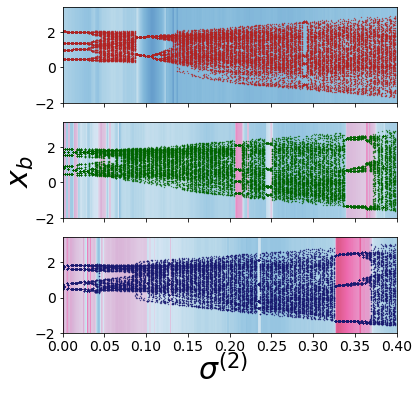

In [291]:
fig, axs = plt.subplots(3,1, figsize=(7, 6), sharex=True)
i_s = [210, 75, 20]
cols = ['firebrick', 'darkgreen', 'midnightblue']
for jjj in range(3):
    k = i_s[jjj]
    axs[jjj].imshow(mle[:,k:k+1].T, extent=(0,.4,-2,3.4), origin='lower', aspect=1/47,cmap=mymap, alpha=.7, vmin=np.min(mle), vmax=np.max(mle))
    for i in range(250):
        if cluster_indicators['1'][i,k]==False:
            x = [i*.4/250]*100
            y = quotient[i, k, -100:, 1]
            axs[jjj].scatter(x, y, color=cols[jjj], s=.1)
    axs[jjj].tick_params(axis='y', labelsize= 14)
fig.text(0.5, 0.04, r"$\sigma^{(2)}$", ha='center', va='center', fontsize=30)
plt.xticks(fontsize=14)
fig.text(.1, 0.5, r"$x_b$", va='center', ha='center', rotation='vertical', fontsize=30)

In [ ]:
np.sin(np.pi/2)**2

In [ ]:
x = np.zeros(15)
x[[1,3,5]] = 8
x

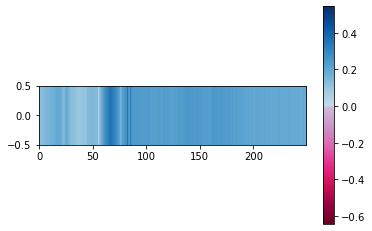

In [203]:
mymap = stability_cmap(mle)
plt.imshow(mle[:,210:211].T, origin='lower', aspect=55,cmap=mymap, vmin=np.min(mle), vmax=np.max(mle))
plt.colorbar()

In [183]:
mle[:,210:211]

array([[0.12137128],
       [0.12663908],
       [0.13168308],
       [0.13649414],
       [0.14108687],
       [0.14547164],
       [0.14968256],
       [0.15372422],
       [0.15761324],
       [0.16134957],
       [0.16494788],
       [0.16840304],
       [0.1728426 ],
       [0.17705531],
       [0.1811279 ],
       [0.18506842],
       [0.18888423],
       [0.19258211],
       [0.19616829],
       [0.19732411],
       [0.19183444],
       [0.16338487],
       [0.15204523],
       [0.1435101 ],
       [0.17470286],
       [0.19018092],
       [0.1911984 ],
       [0.15845309],
       [0.14961059],
       [0.13146917],
       [0.12772699],
       [0.12696782],
       [0.12083227],
       [0.11759691],
       [0.11174146],
       [0.10582158],
       [0.09571612],
       [0.09988149],
       [0.09907905],
       [0.10431642],
       [0.11237295],
       [0.10920505],
       [0.1054977 ],
       [0.10426056],
       [0.11638616],
       [0.14405232],
       [0.13562647],
       [0.139